In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt

The above code block imports some of the nessisary modules for the code.
Tensorflow is a very popular machine learning framework. Keras provides addtional neural network modules that are built on top of tensorflow.

In [ ]:
import numpy as np
#Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Bias is set to default value of 1 for each instance. tf.constant creates a constant tensor. Tensor is the common data structure used in tensorflow.

In [ ]:
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)

print(theta)

tf.Tensor(
[[-3.7144665e+01]
 [ 4.3637392e-01]
 [ 9.3933418e-03]
 [-1.0714764e-01]
 [ 6.4542186e-01]
 [-4.1016874e-06]
 [-3.7816020e-03]
 [-4.2341197e-01]
 [-4.3682083e-01]], shape=(9, 1), dtype=float32)


This is the normal equation used to minimize the cost function used in training

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


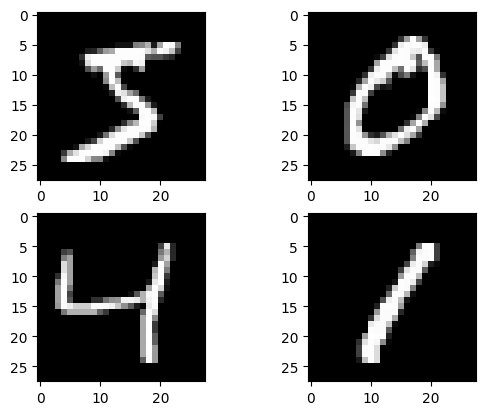

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

MNIST dataset contains 70,000 images of handwritten digits. Shown above are examples of 5, 0 , 4, 1. Each image is of size 28x28 pixels. Therefore 784 input features and 10 classes with each class being a digit.

In [ ]:

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs (0000000001, 0000000010, 0000000100 ...)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
num_classes = y_test.shape[1]

def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 6s - 20ms/step - accuracy: 0.9198 - loss: 0.2839 - val_accuracy: 0.9608 - val_loss: 0.1384
Epoch 2/10
300/300 - 6s - 21ms/step - accuracy: 0.9683 - loss: 0.1117 - val_accuracy: 0.9719 - val_loss: 0.0993
Epoch 3/10
300/300 - 10s - 33ms/step - accuracy: 0.9801 - loss: 0.0721 - val_accuracy: 0.9764 - val_loss: 0.0793
Epoch 4/10
300/300 - 9s - 31ms/step - accuracy: 0.9858 - loss: 0.0498 - val_accuracy: 0.9789 - val_loss: 0.0701
Epoch 5/10
300/300 - 7s - 22ms/step - accuracy: 0.9904 - loss: 0.0365 - val_accuracy: 0.9798 - val_loss: 0.0636
Epoch 6/10
300/300 - 5s - 16ms/step - accuracy: 0.9931 - loss: 0.0262 - val_accuracy: 0.9812 - val_loss: 0.0636
Epoch 7/10
300/300 - 6s - 21ms/step - accuracy: 0.9946 - loss: 0.0203 - val_accuracy: 0.9825 - val_loss: 0.0593
Epoch 8/10
300/300 - 5s - 18ms/step - accuracy: 0.9965 - loss: 0.0154 - val_accuracy: 0.9822 - val_loss: 0.0579
Epoch 9/10
300/300 - 5s - 17ms/step - accuracy: 0.9979 - loss: 0.0103 - val_accuracy: 0.9816 - val_loss

This is the result with the deafault parameters of the model

In [ ]:
# define baseline model
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='leaky_relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - 17ms/step - accuracy: 0.5372 - loss: 1.7507 - val_accuracy: 0.7495 - val_loss: 1.3124
Epoch 2/10
300/300 - 6s - 19ms/step - accuracy: 0.7840 - loss: 1.1216 - val_accuracy: 0.8252 - val_loss: 0.9331
Epoch 3/10
300/300 - 9s - 30ms/step - accuracy: 0.8277 - loss: 0.8616 - val_accuracy: 0.8477 - val_loss: 0.7536
Epoch 4/10
300/300 - 7s - 22ms/step - accuracy: 0.8458 - loss: 0.7260 - val_accuracy: 0.8633 - val_loss: 0.6511
Epoch 5/10
300/300 - 9s - 30ms/step - accuracy: 0.8566 - loss: 0.6432 - val_accuracy: 0.8709 - val_loss: 0.5850
Epoch 6/10
300/300 - 6s - 19ms/step - accuracy: 0.8634 - loss: 0.5872 - val_accuracy: 0.8773 - val_loss: 0.5387
Epoch 7/10
300/300 - 10s - 33ms/step - accuracy: 0.8690 - loss: 0.5466 - val_accuracy: 0.8815 - val_loss: 0.5042
Epoch 8/10
300/300 - 10s - 32ms/step - accuracy: 0.8736 - loss: 0.5157 - val_accuracy: 0.8859 - val_loss: 0.4776
Epoch 9/10
300/300 - 6s - 21ms/step - accuracy: 0.8778 - loss: 0.4913 - val_accuracy: 0.8887 - val_los

Change activation function to leaky relu and optimizer to adagrad.
ReLU activation function maps the neuron value to 0 if it is negative and does not modify it if it is positive. Leaky ReLU on the other hand, maps negative values to (ax) where a is a very small constant. This means that negative neurons are not dead neurons and still can pass information to next layers.
Adam optimizer combines momentum and Root Mean Squared algorithims to correct the weights and biases of the network parameters.
Adagrad independetly adapts the learning rate while optimizing.
The results of the chages show a much worse baseline error of 10.89% when compared to the previous 1.82%. This is likley due to Adam being a better optimizer than Adagrad so it would theoretically take adagrad more epochs to achive a similar result.

In [ ]:
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
1875/1875 - 30s - 16ms/step - accuracy: 0.9423 - loss: 0.1907 - val_accuracy: 0.9688 - val_loss: 0.1040
Epoch 2/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9768 - loss: 0.0753 - val_accuracy: 0.9750 - val_loss: 0.0710
Epoch 3/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9847 - loss: 0.0483 - val_accuracy: 0.9793 - val_loss: 0.0658
Epoch 4/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9887 - loss: 0.0344 - val_accuracy: 0.9817 - val_loss: 0.0634
Epoch 5/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9916 - loss: 0.0245 - val_accuracy: 0.9811 - val_loss: 0.0682
Epoch 6/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9804 - val_loss: 0.0708
Epoch 7/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9810 - val_loss: 0.0777
Epoch 8/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9805 - val_loss: 0.0741
Epoch 9/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9957 - loss: 0.0125 - val_accu

Here the default parameters where reverted back and now the batch size was changed to 32 from 200. This results in much more computations as shown by the time to complete each epoch. Even though the time per step is lower overall time increases by factor of 2x-6x. This though does not result in a meaningful change as the error is the same. Therefore it is better to have higher batch size in this case.

In [ ]:
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
300/300 - 13s - 42ms/step - accuracy: 0.9206 - loss: 0.2785 - val_accuracy: 0.9581 - val_loss: 0.1482
Epoch 2/20
300/300 - 16s - 54ms/step - accuracy: 0.9681 - loss: 0.1107 - val_accuracy: 0.9734 - val_loss: 0.0923
Epoch 3/20
300/300 - 9s - 29ms/step - accuracy: 0.9796 - loss: 0.0708 - val_accuracy: 0.9781 - val_loss: 0.0722
Epoch 4/20
300/300 - 6s - 20ms/step - accuracy: 0.9857 - loss: 0.0511 - val_accuracy: 0.9780 - val_loss: 0.0677
Epoch 5/20
300/300 - 10s - 34ms/step - accuracy: 0.9892 - loss: 0.0372 - val_accuracy: 0.9798 - val_loss: 0.0615
Epoch 6/20
300/300 - 9s - 31ms/step - accuracy: 0.9928 - loss: 0.0269 - val_accuracy: 0.9801 - val_loss: 0.0616
Epoch 7/20
300/300 - 6s - 21ms/step - accuracy: 0.9953 - loss: 0.0194 - val_accuracy: 0.9813 - val_loss: 0.0567
Epoch 8/20
300/300 - 5s - 16ms/step - accuracy: 0.9964 - loss: 0.0153 - val_accuracy: 0.9812 - val_loss: 0.0591
Epoch 9/20
300/300 - 7s - 23ms/step - accuracy: 0.9977 - loss: 0.0110 - val_accuracy: 0.9823 - val_lo

Here the deafault parameters are reverted but epochs are set to 20 from 10. As expected this decareases the baseline error. However we can see the loss becoming marginally small so if epochs were increased even more to 100 for example it would not be significantly better but would incure significant computational costs. This is why many models employ early stopping so when the loss becomes small enough the model stops running epochs as the amount is different for each model.

In [ ]:
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(128, activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 9s - 29ms/step - accuracy: 0.9199 - loss: 0.2888 - val_accuracy: 0.9588 - val_loss: 0.1393
Epoch 2/10
300/300 - 7s - 23ms/step - accuracy: 0.9710 - loss: 0.0989 - val_accuracy: 0.9712 - val_loss: 0.0907
Epoch 3/10
300/300 - 12s - 40ms/step - accuracy: 0.9806 - loss: 0.0637 - val_accuracy: 0.9777 - val_loss: 0.0716
Epoch 4/10
300/300 - 7s - 23ms/step - accuracy: 0.9873 - loss: 0.0411 - val_accuracy: 0.9792 - val_loss: 0.0665
Epoch 5/10
300/300 - 10s - 34ms/step - accuracy: 0.9914 - loss: 0.0284 - val_accuracy: 0.9788 - val_loss: 0.0673
Epoch 6/10
300/300 - 11s - 36ms/step - accuracy: 0.9938 - loss: 0.0206 - val_accuracy: 0.9776 - val_loss: 0.0754
Epoch 7/10
300/300 - 11s - 37ms/step - accuracy: 0.9952 - loss: 0.0158 - val_accuracy: 0.9803 - val_loss: 0.0699
Epoch 8/10
300/300 - 5s - 18ms/step - accuracy: 0.9965 - loss: 0.0114 - val_accuracy: 0.9816 - val_loss: 0.0651
Epoch 9/10
300/300 - 8s - 25ms/step - accuracy: 0.9961 - loss: 0.0116 - val_accuracy: 0.9833 - val_l

Here the parameters are set back to default values and an extra dense layer is added to test the theory that deeper networks are always better. 128 is chosen as an arbirtary amount between num_pixels which is 784 and num classes which is 10. It keeps the same activation function as default. Here we can see that the error is more than the previous. This is likley due to overfitting the dataset since there are too many neurons and layers. This can be a very difficult value to test due to the amount of layers, types of layers and number of neurons per layer as well as other parameters.

Overall there are many different parameters to be tuned for models. Here parameters were tested manually and compared for better understanding. However there are functions such as GridSearchCV as well as others that are used to test various combinations of hyperparameters automatically and return the model with the best result.